In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def load_images(path1, path2):
    img1 = Image.open(path1).convert("RGB")
    img2 = Image.open(path2).convert("RGB")
    if img1.size != img2.size:
        raise ValueError("Obrazy muszą mieć takie same wymiary.")
    return img1, img2

def hide_image(container, secret, bits):
    if bits < 1 or bits > 4:
        raise ValueError("Liczba bitów musi być z przedziału 1–4.")

    container_np = np.array(container).astype(np.uint8)
    secret_np = np.array(secret).astype(np.uint8)

    shift_secret = 8 - bits

    # Poprawna maska do wyzerowania najmłodszych bitów
    container_mask = 0xFF - (2**bits - 1)
    secret_mask = 2**bits - 1

    container_cleared = container_np & container_mask
    secret_shifted = (secret_np >> shift_secret) & secret_mask

    combined = container_cleared | secret_shifted
    return Image.fromarray(combined.astype(np.uint8))

def extract_image(stego_img, bits):
    stego_np = np.array(stego_img)
    extracted = (stego_np & (0xFF >> (8 - bits))) << (8 - bits)
    return Image.fromarray(extracted.astype(np.uint8))

def image_difference(img1, img2):
    arr1 = np.array(img1, dtype=int)
    arr2 = np.array(img2, dtype=int)
    return np.mean(np.sqrt(np.sum((arr1 - arr2)**2, axis=2)))  # RGB distance

def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

In [7]:
container_path = "krajobraz.jpg"
secret_path = "kot.jpg"

container, secret = load_images(container_path, secret_path)


--- 2 bity ---
Średnia różnica RGB kontenera i kontenera z ukrytym obrazem: 2.32


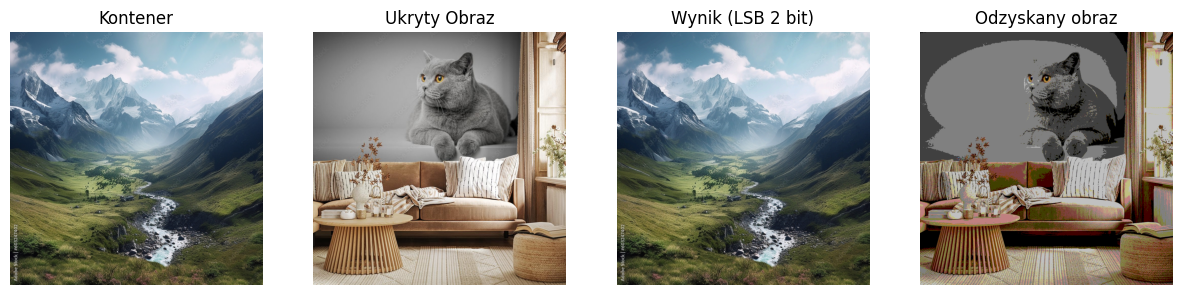


--- 3 bity ---
Średnia różnica RGB kontenera i kontenera z ukrytym obrazem: 4.70


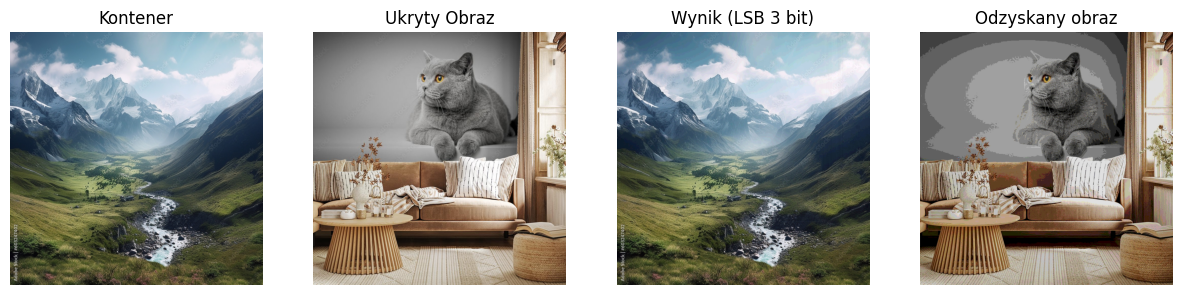


--- 4 bity ---
Średnia różnica RGB kontenera i kontenera z ukrytym obrazem: 9.44


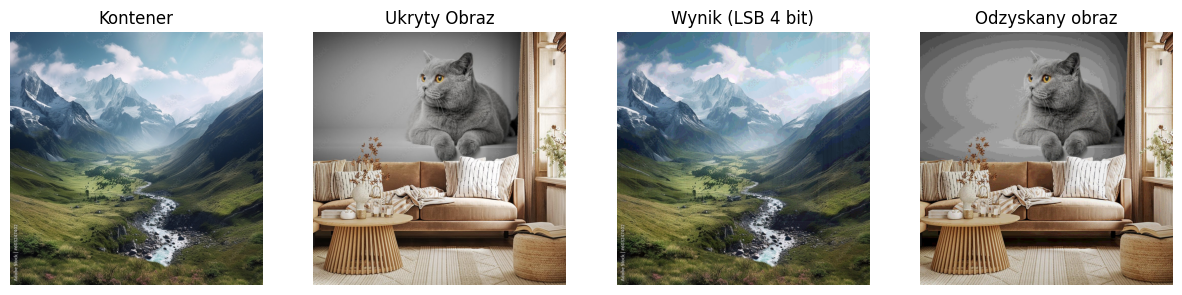

In [8]:
for bits in [2, 3, 4]:
    print(f"\n--- {bits} bity ---")
    stego = hide_image(container, secret, bits)
    extracted = extract_image(stego, bits)

    diff = image_difference(container, stego)
    print(f"Średnia różnica RGB kontenera i kontenera z ukrytym obrazem: {diff:.2f}")

    show_images(
        [container, secret, stego, extracted],
        ["Kontener", "Ukryty Obraz", f"Wynik (LSB {bits} bit)", f"Odzyskany obraz"]
    )


--- 2 bity ---
Średnia różnica RGB: 2.32


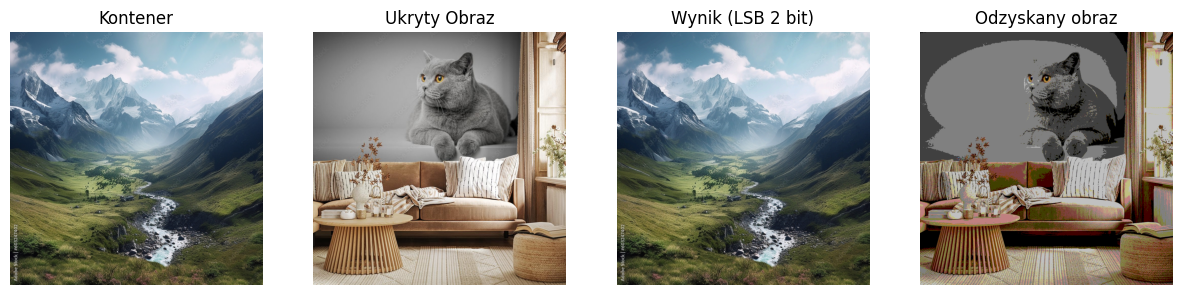


--- 3 bity ---
Średnia różnica RGB: 4.70


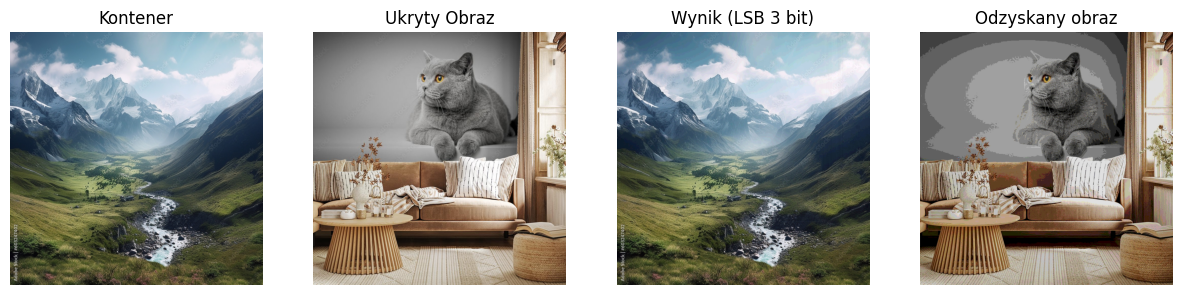


--- 4 bity ---
Średnia różnica RGB: 9.44


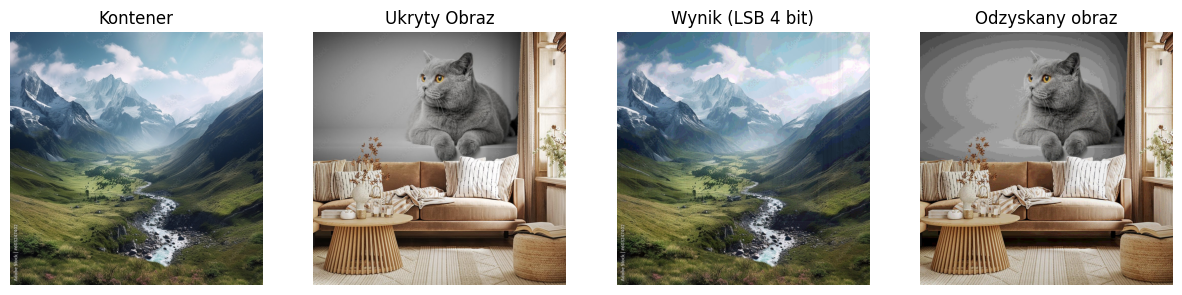

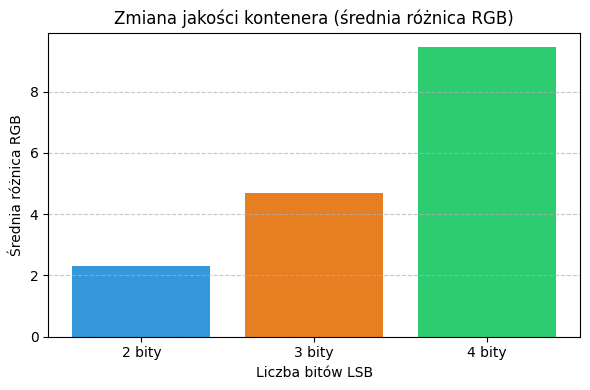

In [9]:
bit_values = [2, 3, 4]
differences = []

for bits in bit_values:
    print(f"\n--- {bits} bity ---")
    stego = hide_image(container, secret, bits)
    extracted = extract_image(stego, bits)

    diff = image_difference(container, stego)
    print(f"Średnia różnica RGB: {diff:.2f}")
    differences.append(diff)

    show_images(
        [container, secret, stego, extracted],
        ["Kontener", "Ukryty Obraz", f"Wynik (LSB {bits} bit)", f"Odzyskany obraz"]
    )

plt.figure(figsize=(6, 4))
plt.bar([f"{b} bity" for b in bit_values], differences, color=["#3498db", "#e67e22", "#2ecc71"])
plt.title("Zmiana jakości kontenera (średnia różnica RGB)")
plt.ylabel("Średnia różnica RGB")
plt.xlabel("Liczba bitów LSB")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()